<a href="https://colab.research.google.com/github/Zlovredniy/project2021/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colaboratory!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import pandas as pd #импортируем необходимые библиотеки

In [18]:
df = pd.read_excel("Выгрузка_9_Апреля.xlsx")
df[:10] #читаем наш файл

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
5,6,WSR/1-831/2019,2019-04-09,Исх01/0403\n02.04.2019,Миронова С.В.,Островский А.В. (Губернатор Смоленской области),Вх - Об участии в Чемпионате мира по профессио...,NaN
6,7,WSR/1-830/2019,2019-04-09,24-2/10/В-1940\n14.03.2019,Уразов Р.Н.,Петрова С.В. (Министерство труда и социальной ...,"Вх - О направлении протокола ""О ходе реализаци...",NaN
7,8,WSR/1.6-832/2019,2019-04-09,08-04-21/1408\n08.04.2019,Тымчиков А.Ю.,"Соппа И.В. (ФГБОУ ВО ""Московский политехническ...",Вх - О согласовании дат проведения Вузовского ...,NaN
8,9,WSR/1-836/2019,2019-04-09,3571/19\n08.04.2019,Уразов Р.Н.,Бурганов Р.Т. (Министерство образования и наук...,О Национальном чемпионате 2019,NaN
9,10,WSR/1-829/2019,2019-04-08,05-337\n08.04.2019,Уразов Р.Н.,Черноскутова И.А. (Министерство просвещения Ро...,Вх - О проведении заседания министров образова...,NaN


# ***Задание 1.1***
Задача автоматической сортировки корреспонденции заключается в определении адресата для входящих документов. Исходя из этого, необходимо определить, какие атрибуты имеют наибольшее влияние на классификацию входящих документов и оставить только их для последующего обучения. Также необходимо обосновать выбор атрибутов

In [21]:
df= df.drop('Примечание', axis=1) #В данной столбике находится много пустых значений(NaN) и ненужных для обработки данных
df[:10]

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание
0,1,WSR/1-838/2019,2019-04-09,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,2,WSR/1-837/2019,2019-04-09,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,3,WSR/1-835/2019,2019-04-09,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,4,WSR/1-834/2019,2019-04-09,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,5,WSR/1-833/2019,2019-04-09,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
5,6,WSR/1-831/2019,2019-04-09,Исх01/0403\n02.04.2019,Миронова С.В.,Островский А.В. (Губернатор Смоленской области),Вх - Об участии в Чемпионате мира по профессио...
6,7,WSR/1-830/2019,2019-04-09,24-2/10/В-1940\n14.03.2019,Уразов Р.Н.,Петрова С.В. (Министерство труда и социальной ...,"Вх - О направлении протокола ""О ходе реализаци..."
7,8,WSR/1.6-832/2019,2019-04-09,08-04-21/1408\n08.04.2019,Тымчиков А.Ю.,"Соппа И.В. (ФГБОУ ВО ""Московский политехническ...",Вх - О согласовании дат проведения Вузовского ...
8,9,WSR/1-836/2019,2019-04-09,3571/19\n08.04.2019,Уразов Р.Н.,Бурганов Р.Т. (Министерство образования и наук...,О Национальном чемпионате 2019
9,10,WSR/1-829/2019,2019-04-08,05-337\n08.04.2019,Уразов Р.Н.,Черноскутова И.А. (Министерство просвещения Ро...,Вх - О проведении заседания министров образова...


In [25]:
df = df.drop('Дата\nрегистрации', axis = 1) # данные с датой нам так же ненужны
df[:10]

,№ п/п,№\nдокумента,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание
0,1,WSR/1-838/2019,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,2,WSR/1-837/2019,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,3,WSR/1-835/2019,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,4,WSR/1-834/2019,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,5,WSR/1-833/2019,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
5,6,WSR/1-831/2019,Исх01/0403\n02.04.2019,Миронова С.В.,Островский А.В. (Губернатор Смоленской области),Вх - Об участии в Чемпионате мира по профессио...
6,7,WSR/1-830/2019,24-2/10/В-1940\n14.03.2019,Уразов Р.Н.,Петрова С.В. (Министерство труда и социальной ...,"Вх - О направлении протокола ""О ходе реализаци..."
7,8,WSR/1.6-832/2019,08-04-21/1408\n08.04.2019,Тымчиков А.Ю.,"Соппа И.В. (ФГБОУ ВО ""Московский политехническ...",Вх - О согласовании дат проведения Вузовского ...
8,9,WSR/1-836/2019,3571/19\n08.04.2019,Уразов Р.Н.,Бурганов Р.Т. (Министерство образования и наук...,О Национальном чемпионате 2019
9,10,WSR/1-829/2019,05-337\n08.04.2019,Уразов Р.Н.,Черноскутова И.А. (Министерство просвещения Ро...,Вх - О проведении заседания министров образова...


In [29]:
df = df.drop('Исх. №\nДата', axis = 1) #Тоже какая странная дата с номером, зачем она вообще нужна
df[:10]

,№ п/п,№\nдокумента,Адресат,Автор,Краткое\nсодержание
0,1,WSR/1-838/2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,2,WSR/1-837/2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,3,WSR/1-835/2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,4,WSR/1-834/2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,5,WSR/1-833/2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
5,6,WSR/1-831/2019,Миронова С.В.,Островский А.В. (Губернатор Смоленской области),Вх - Об участии в Чемпионате мира по профессио...
6,7,WSR/1-830/2019,Уразов Р.Н.,Петрова С.В. (Министерство труда и социальной ...,"Вх - О направлении протокола ""О ходе реализаци..."
7,8,WSR/1.6-832/2019,Тымчиков А.Ю.,"Соппа И.В. (ФГБОУ ВО ""Московский политехническ...",Вх - О согласовании дат проведения Вузовского ...
8,9,WSR/1-836/2019,Уразов Р.Н.,Бурганов Р.Т. (Министерство образования и наук...,О Национальном чемпионате 2019
9,10,WSR/1-829/2019,Уразов Р.Н.,Черноскутова И.А. (Министерство просвещения Ро...,Вх - О проведении заседания министров образова...


In [35]:
df = df.drop('№ п/п', axis = 1) #Порядковый номер так же не несёт для нас ничего полезного, так как он уже уникально устроен в системе
df

,№\nдокумента,Адресат,Автор,Краткое\nсодержание
0,WSR/1-838/2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,WSR/1-837/2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,WSR/1-835/2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,WSR/1-834/2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,WSR/1-833/2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
...,...,...,...,...
4962,WSR/1.-1749/2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...
4963,WSR/1.-1751/2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...
4964,WSR/1.-1748/2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...
4965,WSR/1.-1747/2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...


In [36]:
df_ndoc = df.drop('№\nдокумента', axis = 1)
df_ndoc

,Адресат,Автор,Краткое\nсодержание
0,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
...,...,...,...
4962,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...
4963,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...
4964,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...
4965,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...


In [30]:
df.info() # чекнуть, что вся типизация верная

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   № п/п               4967 non-null   int64 
 1   №
документа         4965 non-null   object
 2   Адресат             4967 non-null   object
 3   Автор               4967 non-null   object
 4   Краткое
содержание  4967 non-null   object
dtypes: int64(1), object(4)
memory usage: 194.1+ KB


In [45]:
df1 = df.dropna() #Удаляем пустые значения NaN
df1

,№\nдокумента,Адресат,Автор,Краткое\nсодержание
0,WSR/1-838/2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,WSR/1-837/2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...
2,WSR/1-835/2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....
3,WSR/1-834/2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...
4,WSR/1-833/2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...
...,...,...,...,...
4961,WSR/1.-1750/2017,Уразов Р.Н.,Черноскутова И.А. (Министерство образования и ...,О заседании рабочей группы приоритетного проек...
4962,WSR/1.-1749/2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...
4963,WSR/1.-1751/2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...
4964,WSR/1.-1748/2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...


# ***Задание 1.2***
*В исходных данных есть поля, представляющие собой конкатенацию нескольких, иногда разнотипных, значений. Необходимо выделить и разбить такие поля на несколько других*


In [47]:
df1['Компания'] = df1['Автор'].str.extract(r'\((.*?)\)')#отделяем информацию в скобках в отдельный столбик
df1['Автор'] = df1['Автор'].str.replace(r'\([^)]*\)', '', regex=True)#в изначальном столбце удаляем скобочки путём их замены на пустые значения
df1

<ipython-input-47-a25c1f0407a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Компания'] = df1['Автор'].str.extract(r'\((.*?)\)')
<ipython-input-47-a25c1f0407a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Автор'] = df1['Автор'].str.replace(r'\([^)]*\)', '', regex=True)


,№\nдокумента,Адресат,Автор,Краткое\nсодержание,Компания
0,WSR/1-838/2019,Уразов Р.Н.,Антонова С.В.,Вх - О возможности использования сетевого изда...,АО «Интерфакс»
1,WSR/1-837/2019,Уразов Р.Н.,Картошкин С.А.,Вх - Об участии в совещании по вопросу доработ...,Министерство просвещения Российской Федерации
2,WSR/1-835/2019,Уразов Р.Н.,Цивилев С.Е.,Вх - О командировании Саликовой К. и Глушко Д....,Администрация Кемеровской области
3,WSR/1-834/2019,Иванюк Л.А.,Волков Г.А.,Вх - Об участии в Чемпионате мира по профессио...,Министерство транспорта Российской Федерации
4,WSR/1-833/2019,Уразов Р.Н.,Атанов И.В.,Вх - Об участии в церемонии открытия Вузовског...,Ставропольский государственный аграрный универ...
...,...,...,...,...,...
4961,WSR/1.-1750/2017,Уразов Р.Н.,Черноскутова И.А.,О заседании рабочей группы приоритетного проек...,Министерство образования и науки Российской Фе...
4962,WSR/1.-1749/2017,Уразов Р.Н.,Медведев Д.А.,Протокол заседания Президиума Совета при Прези...,Аппарат Правительства Российской Федерации
4963,WSR/1.-1751/2017,Уразов Р.Н.,Синюгина Т.Ю.,О проведении 21.11.2017 заседания организацион...,Министерство образования и науки РФ. Заместите...
4964,WSR/1.-1748/2017,Уразов Р.Н.,Огородова Л.М.,Протокол заседания рабочей группы приоритетног...,Министерство образования и науки Российской Фе...


# ***Задание 1.3***
*Согласно алгоритму направления входящей документации, письма от конкретных лиц и организаций направляются разным сотрудникам Союза. Так, например, от первых лиц министерств – непосредственно Генеральному директору, независимо от указанного адресата. Однако в исходных данных отсутствует информация о том, кем является отправитель. Такая же ситуация с адресатом, система, определяющая направление документа по фамилии будет являться частным случаем решения, и в случае кадровых перестановок не сможет функционировать. В связи с этим, необходимо проанализировать исходный набор данных и дополнить его.*

In [50]:
#Нам необходимо провести кластеризацию, однако это может занять огромное кол-во времени, поэтому оставить этот пункт будет целесообразно.
#Для кластеризации данных, нам нужно определить признаки (features), которые могут помочь в распределении документов по кластерам. В нашем случае мы можем рассмотреть следующие признаки:

#1.Отправитель:
#Первые лица министерств.
#Организации, имеющие особый статус отправителя.

#2.Адресат:
#Генеральный директор.
#Сотрудники, ответственные за обработку определенных типов документов.

#3.Содержание письма:
#Ключевые слова или фразы в содержании, которые могут указывать на особые типы документов или их направление.

#4.Контекст:
#Информация из предыдущих писем, которая может подсказать о том, кому следует направить новое письмо.

#После того как у нас есть эти признаки, мы можем использовать различные алгоритмы кластеризации, такие как k-means, иерархическая кластеризация или DBSCAN.

#Примерно как:
# Выбираем признаки для кластеризации
# Заполняем пропущенные значения (если есть)
# Приводим данные к числовому виду (если необходимо)
# Кластеризуем данные с использованием любого из методов(например k-means)

# ***Задание 1.4***
*Используя программные средства, визуализируйте зависимости атрибутов в наборе данных.  Визуализация должна отражать влияние атрибутов на определение класса (адресата). Произведите расчеты зависимостей по выбранным алгоритмам. Приведите интерпретацию полученным результатам.*

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
#Импортируем необходимые библиотеки для визуализации

In [75]:
#Создаем объект TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
#Преобразуем текстовые данные в матрицу TF-IDF
X_tfidf_vectorizer = tfidf_vectorizer.fit_transform(df1['Краткое\nсодержание'])
#Преобразуем разреженную матрицу TF-IDF в массив (dense array) для удобства вывода
X_tfidf_vectorizer.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
#Применение метода t-SNE для уменьшения размерности данных до 2D
X_embedded_visual = TSNE(n_components = 2).fit_transform(X_tfidf_vectorizer.toarray())
X_embedded_visual

array([[ 32.353653 , -51.305313 ],
       [ -0.8213958,   7.2056274],
       [ -6.7133994, -27.8427   ],
       ...,
       [-46.957565 ,  -1.8733542],
       [-36.529385 , -17.415865 ],
       [-36.529385 , -17.415865 ]], dtype=float32)

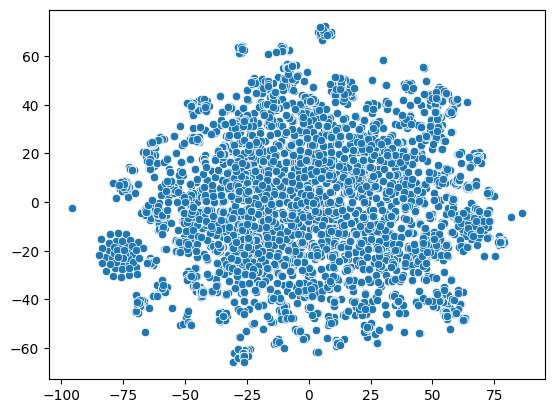

In [88]:
#Создание scatter plot на основе результатов визуализации t-SNE
sns.scatterplot(x=X_embedded_visual[:, 0], y=X_embedded_visual[:, 1])
plt.show()